In [22]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-

# Notebook baseado no código do artigo abaixo.
# -> How To Compare Machine Learning Algorithms in Python with scikit-learn. Disponível em <https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/> 

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



RANDOM_SEED = 146
SAMPLE_SIZE = 0.8
ITERACOES = 100

In [18]:
# Carregando a base
INPUT_FILE = "../../the_base.csv";
SEPARATOR = ";"
DECIMAL = ","

loaded_base = pd.read_csv(INPUT_FILE, sep=SEPARATOR,
                header=0, decimal=DECIMAL)

# Dividindo nossa base entre atributos (model) e classes.
attributes = loaded_base.drop(['FilmeId', 'Classe'], axis=1)
classes = loaded_base['Classe']

In [19]:
# Preparando modelos
models = []
models.append(("MLP", MLPClassifier(solver="lbfgs")))
models.append(("LR", LogisticRegression(solver="liblinear")))
models.append(("KNN", KNeighborsClassifier()))
models.append(("TREE", DecisionTreeClassifier()))
models.append(("SVM", SVC(gamma="auto")))

In [20]:
# Obtendo amostra
x_train, x_test, y_train, y_test =  model_selection.train_test_split(
                                                attributes, 
                                                classes, 
                                                test_size=SAMPLE_SIZE, 
                                                random_state=RANDOM_SEED);
              

In [21]:
# Comparando modelos
def getResults(verbose=True, seed=RANDOM_SEED):
    results = []
    names = []
    scoring = 'balanced_accuracy'
    if(verbose):
        print("%s\t%s\t\t%s" % ("Modelo","Média", "STD"))
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        if(verbose):
            print("%s\t%f\t%f" % (name, cv_results.mean(), cv_results.std()))
    return results, names;
    

In [23]:
# Executando ITERAÇÕES.
results = list()
for i in range(ITERACOES):
    print(f"Iteração {i+1}")
    result, names = getResults(verbose=False, seed=i)
    results.append((result,names))


Iteração 1
Iteração 2
Iteração 3
Iteração 4
Iteração 5
Iteração 6
Iteração 7
Iteração 8
Iteração 9
Iteração 10
Iteração 11
Iteração 12
Iteração 13
Iteração 14
Iteração 15
Iteração 16
Iteração 17
Iteração 18
Iteração 19
Iteração 20
Iteração 21
Iteração 22
Iteração 23
Iteração 24
Iteração 25
Iteração 26
Iteração 27
Iteração 28
Iteração 29
Iteração 30
Iteração 31
Iteração 32
Iteração 33
Iteração 34
Iteração 35
Iteração 36
Iteração 37
Iteração 38
Iteração 39
Iteração 40
Iteração 41
Iteração 42
Iteração 43
Iteração 44
Iteração 45
Iteração 46
Iteração 47
Iteração 48
Iteração 49
Iteração 50
Iteração 51
Iteração 52
Iteração 53
Iteração 54
Iteração 55
Iteração 56
Iteração 57
Iteração 58
Iteração 59
Iteração 60
Iteração 61
Iteração 62
Iteração 63
Iteração 64
Iteração 65
Iteração 66
Iteração 67
Iteração 68
Iteração 69
Iteração 70
Iteração 71
Iteração 72
Iteração 73
Iteração 74
Iteração 75
Iteração 76
Iteração 77
Iteração 78
Iteração 79
Iteração 80
Iteração 81
Iteração 82
Iteração 83
Iteração 84
I

In [24]:
# Preparando os valores para plotagem
resultados = {}
nomes = results[1][1]
for n in nomes:
    resultados[n]=list()

for values, names in results:
    for n, v in zip(names, values):
        resultados[n] += v.tolist()


labels, data = [*zip(*resultados.items())]

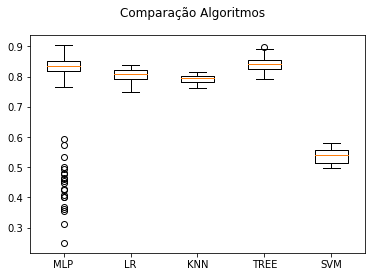

In [25]:
# Plotando.

fig = plt.figure()
fig.suptitle("Comparação Algoritmos")
ax = fig.add_subplot(111)
plt.boxplot(data)
ax.set_xticklabels(labels)
plt.show()
